In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import datetime

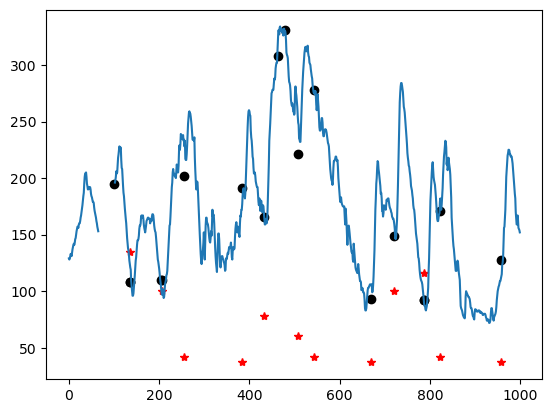

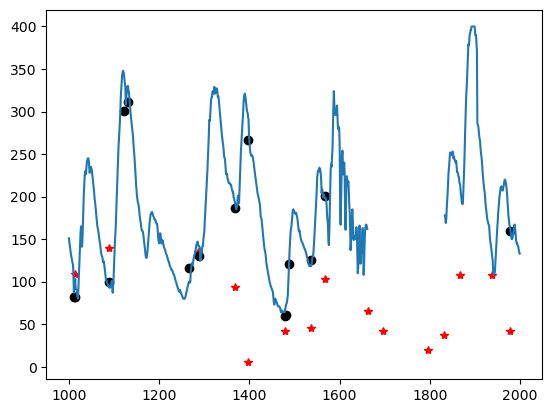

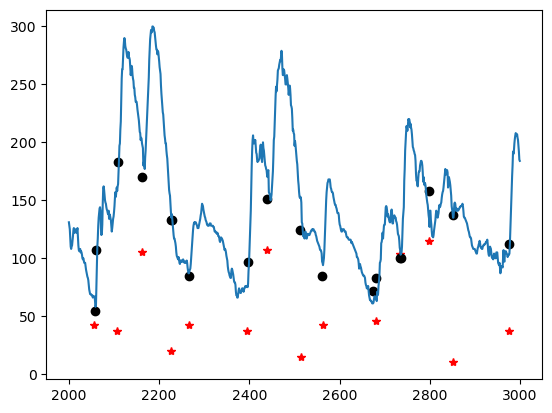

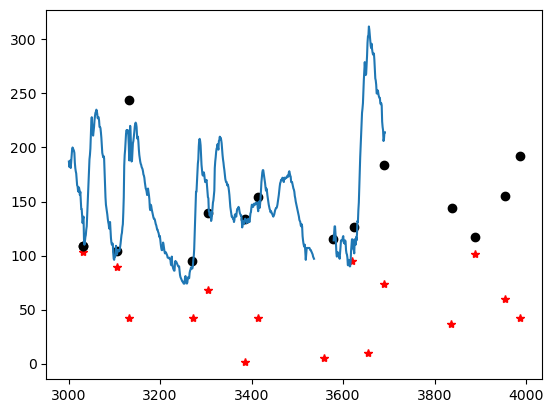

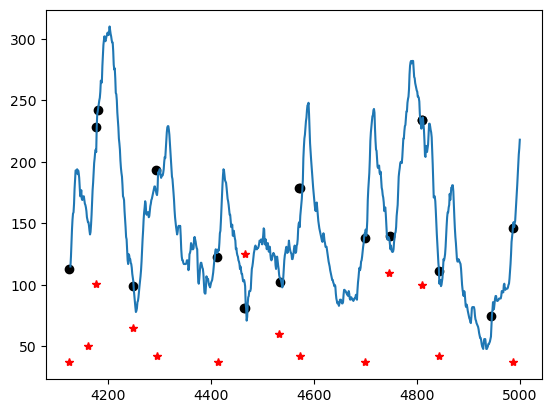

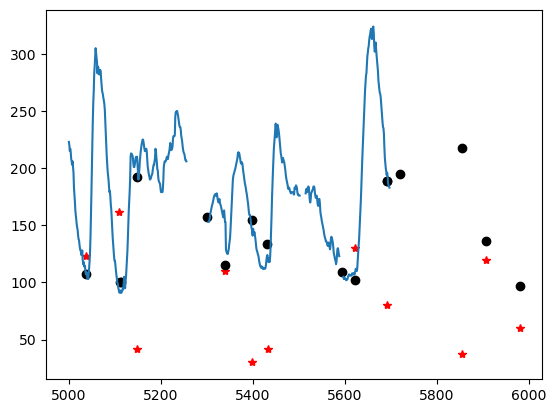

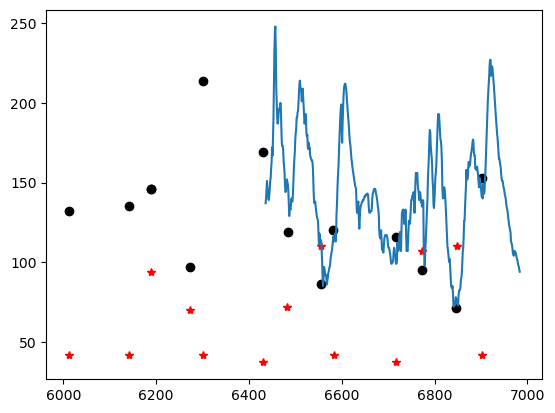

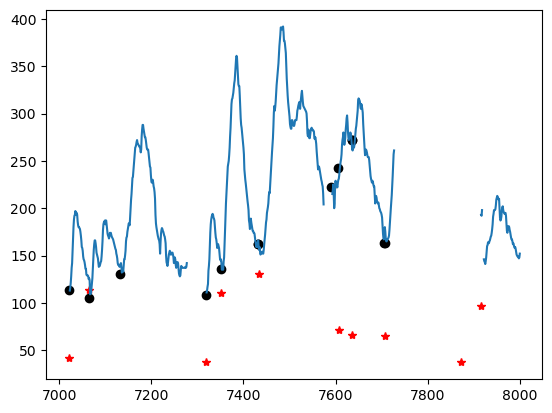

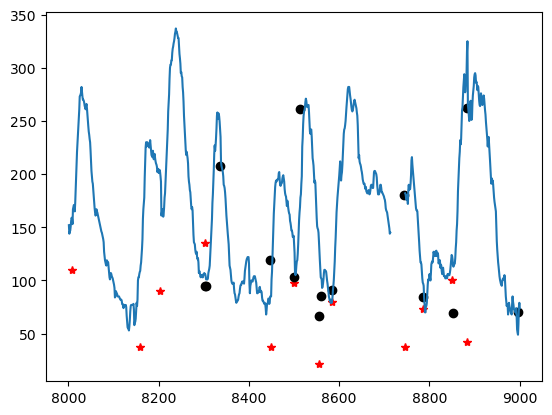

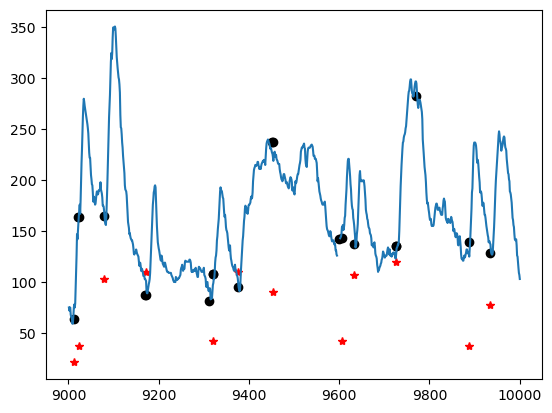

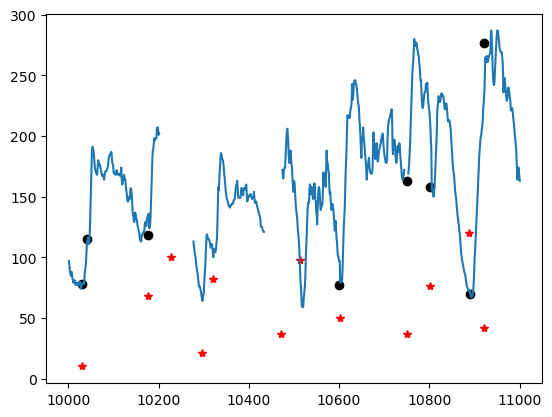

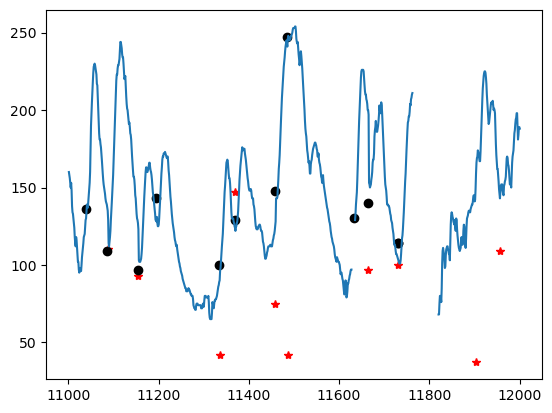

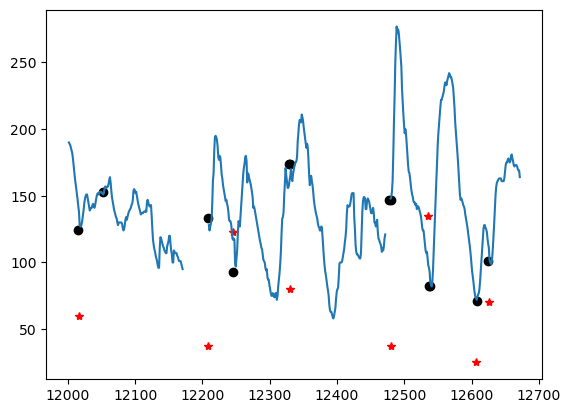

In [87]:
# Load the dataset
df = pd.read_csv("../../data/Ohio2020_processed/train/540-ws-training_processed.csv")
# Start time samples from zero
df["5minute_intervals_timestamp"] = df["5minute_intervals_timestamp"] - df["5minute_intervals_timestamp"][0]

filtered_df_carbs = df[df["carbInput"].notnull()]
filtered_df_finger = df[df["finger"].notnull()]
for i in range(13):
    start = i*1000
    end = (i+1)*1000
    plt.figure()
    plt.plot(df["5minute_intervals_timestamp"][start:end], df["carbInput"][start:end], "r*", label="CarbInput")
    plt.plot(df["5minute_intervals_timestamp"][start:end], df["finger"][start:end], "ko", label="CarbInput")
    plt.plot(df["5minute_intervals_timestamp"][start:end], df["cbg"][start:end], label="CarbInput")

In [88]:
df

,5minute_intervals_timestamp,missing_cbg,cbg,finger,basal,hr,gsr,carbInput,bolus
0,0.000000,0.0,129.0,NaN,1.8,NaN,NaN,NaN,NaN
1,1.000126,0.0,128.0,NaN,1.8,NaN,NaN,NaN,NaN
2,2.000253,0.0,129.0,NaN,1.8,NaN,NaN,NaN,NaN
3,3.000379,0.0,131.0,NaN,1.8,NaN,NaN,NaN,NaN
4,4.000505,0.0,133.0,NaN,1.8,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
12666,12667.599495,0.0,172.0,NaN,1.5,NaN,0.202813,NaN,NaN
12667,12668.599621,0.0,170.0,NaN,1.5,NaN,0.018449,NaN,NaN
12668,12669.599747,0.0,169.0,NaN,1.5,NaN,0.020681,NaN,NaN
12669,12670.599874,0.0,169.0,NaN,1.5,NaN,0.055307,NaN,NaN


In [80]:
df[df["carbInput"] > 0]

,5minute_intervals_timestamp,missing_cbg,cbg,finger,basal,hr,gsr,carbInput,bolus
841,841.067367,0.0,84.0,NaN,0.95,NaN,0.007625,57.0,NaN
871,871.069770,0.0,73.0,NaN,0.95,NaN,0.096926,50.0,NaN
1066,1066.085391,0.0,167.0,NaN,0.40,NaN,0.047011,16.0,NaN
1130,1130.090517,0.0,121.0,NaN,0.40,NaN,0.058657,70.0,NaN
1162,1162.093081,0.0,143.0,NaN,1.90,NaN,0.011865,100.0,NaN
...,...,...,...,...,...,...,...,...,...
12647,12648.013072,0.0,70.0,NaN,0.40,NaN,NaN,50.0,NaN
12676,12677.015395,0.0,76.0,NaN,0.40,NaN,NaN,100.0,NaN
12940,12941.036543,0.0,146.0,NaN,0.40,NaN,0.320193,23.0,NaN
12968,12969.038785,0.0,100.0,NaN,0.40,NaN,0.042186,30.0,NaN


In [60]:
df["5minute_intervals_timestamp"][0]

0.0

In [61]:
df['5minute_intervals_timestamp'] = pd.to_datetime(df['5minute_intervals_timestamp'], unit='ms')
df

,5minute_intervals_timestamp,missing_cbg,cbg,finger,basal,hr,gsr,carbInput,bolus
0,1970-01-01 00:00:00.000000000,0.0,76.0,80.0,NaN,NaN,0.337214,NaN,NaN
1,1970-01-01 00:00:00.001000080,0.0,72.0,NaN,NaN,NaN,0.317671,NaN,NaN
2,1970-01-01 00:00:00.002000160,0.0,68.0,NaN,NaN,NaN,0.342821,NaN,NaN
3,1970-01-01 00:00:00.003000240,0.0,65.0,NaN,NaN,NaN,0.359941,NaN,NaN
4,1970-01-01 00:00:00.004000320,0.0,63.0,NaN,NaN,NaN,0.365833,NaN,NaN
...,...,...,...,...,...,...,...,...,...
13104,1970-01-01 00:00:13.105049680,0.0,255.0,NaN,0.8,NaN,NaN,NaN,NaN
13105,1970-01-01 00:00:13.106049760,0.0,258.0,NaN,0.8,NaN,NaN,NaN,NaN
13106,1970-01-01 00:00:13.107049840,0.0,258.0,NaN,0.8,NaN,NaN,NaN,NaN
13107,1970-01-01 00:00:13.108049920,0.0,257.0,NaN,0.8,NaN,NaN,NaN,NaN


In [62]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

# Visualize the data
plt.figure(figsize=(15, 8))
plt.plot(df.index, df['IPG2211A2N'], label='Electric Production')
plt.xlabel('Date')
plt.ylabel('Electric Production')
plt.title('Electric Production Data')
plt.legend()
plt.show()

KeyError: 'DATE'